CLUSTERING with TOPIC MODELLING

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob
import json

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [81]:
root_path = r'C:\Users\aksha\Downloads\CAPSTONE\cord-19\2022-02-07'
metadata_path = f'{root_path}\metadata.csv'
meta_df = pd.read_csv(metadata_path, dtype={
    'pubmed_id': str,
    'Microsoft Academic Paper ID': str, 
    'doi': str
})
meta_df.head()

<ipython-input-81-e0f2f434dc3d>:3: DtypeWarning: Columns (1,5,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  meta_df = pd.read_csv(metadata_path, dtype={


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [16]:
# meta_df=meta_df_long.sample(2500)

In [158]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909598 entries, 0 to 909597
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cord_uid          909598 non-null  object 
 1   sha               316061 non-null  object 
 2   source_x          909598 non-null  object 
 3   title             909141 non-null  object 
 4   doi               528139 non-null  object 
 5   pmcid             328946 non-null  object 
 6   pubmed_id         416747 non-null  object 
 7   license           909598 non-null  object 
 8   abstract          691597 non-null  object 
 9   publish_time      909340 non-null  object 
 10  authors           888478 non-null  object 
 11  journal           849741 non-null  object 
 12  mag_id            0 non-null       float64
 13  who_covidence_id  413615 non-null  object 
 14  arxiv_id          12223 non-null   object 
 15  pdf_json_files    316061 non-null  object 
 16  pmc_json_files    26

In [25]:
import random


In [87]:
all_json_long = glob.glob(f'{root_path}/**/*.json', recursive=True)
len(all_json)

602087

In [88]:
# sample_list = random.choices(original_list, k=3)
all_json = random.choices(all_json_long, k=50000)
len(all_json)

50000

In [89]:
class FileReader:
    def __init__(self, file_path):
        with open(file_path) as file:
            content = json.load(file)
            self.paper_id = content['paper_id']
            self.abstract = []
            self.body_text = []
            # Abstract
            for entry in content['abstract']:
                self.abstract.append(entry['text'])
            # Body text
            for entry in content['body_text']:
                self.body_text.append(entry['text'])
            self.abstract = '\n'.join(self.abstract)
            self.body_text = '\n'.join(self.body_text)
    def __repr__(self):
        return f'{self.paper_id}: {self.abstract[:200]}... {self.body_text[:200]}...'
first_row = FileReader(all_json[0])
print(first_row)

5b0f272a46faeaa5edf84e839933f800308bb4c1:  Most children did not require any treatment and all children were discharged well from hospital  Low TWC, ALC and ANC; Raised CRP and AST were more frequent in symptomatic children  Few adult care... The novel-Coronavirus disease 2019 has become an international health priority, since its first appearance in December 2019. Its infection rate and disease progress appear to differ significantly betw...


In [160]:
def get_breaks(content, length):
    data = ""
    words = content.split(' ')
    total_chars = 0

    # add break every length characters
    for i in range(len(words)):
        total_chars += len(words[i])
        if total_chars > length:
            data = data + "<br>" + words[i]
            total_chars = 0
        else:
            data = data + " " + words[i]
    return data

In [161]:
dict_ = {'paper_id': [], 'doi':[], 'abstract': [], 'body_text': [], 'authors': [], 'title': [], 'journal': [], 'abstract_summary': []}
for idx, entry in enumerate(all_json):
    if idx % (len(all_json) // 10) == 0:
        print(f'Processing index: {idx} of {len(all_json)}')
    
    try:
        content = FileReader(entry)
    except Exception as e:
        continue  # invalid paper format, skip
    
    # get metadata information
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
    # no metadata, skip this paper
    if len(meta_data) == 0:
        continue
    
    dict_['abstract'].append(content.abstract)
    dict_['paper_id'].append(content.paper_id)
    dict_['body_text'].append(content.body_text)
    
    # also create a column for the summary of abstract to be used in a plot
    if len(content.abstract) == 0: 
        # no abstract provided
        dict_['abstract_summary'].append("Not provided.")
    elif len(content.abstract.split(' ')) > 100:
        # abstract provided is too long for plot, take first 100 words append with ...
        info = content.abstract.split(' ')[:100]
        summary = get_breaks(' '.join(info), 40)
        dict_['abstract_summary'].append(summary + "...")
    else:
        # abstract is short enough
        summary = get_breaks(content.abstract, 40)
        dict_['abstract_summary'].append(summary)
        
    # get metadata information
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
    
    try:
        # if more than one author
        authors = meta_data['authors'].values[0].split(';')
        if len(authors) > 2:
            # if more than 2 authors, take them all with html tag breaks in between
            dict_['authors'].append(get_breaks('. '.join(authors), 40))
        else:
            # authors will fit in plot
            dict_['authors'].append(". ".join(authors))
    except Exception as e:
        # if only one author - or Null valie
        dict_['authors'].append(meta_data['authors'].values[0])
    
    # add the title information, add breaks when needed
    try:
        title = get_breaks(meta_data['title'].values[0], 40)
        dict_['title'].append(title)
    # if title was not provided
    except Exception as e:
        dict_['title'].append(meta_data['title'].values[0])
    
    # add the journal information
    dict_['journal'].append(meta_data['journal'].values[0])
    
    # add doi
    dict_['doi'].append(meta_data['doi'].values[0])
    
df_covid = pd.DataFrame(dict_, columns=['paper_id', 'doi', 'abstract', 'body_text', 'authors', 'title', 'journal', 'abstract_summary'])
df_covid.head()

Processing index: 0 of 50000
Processing index: 5000 of 50000
Processing index: 10000 of 50000
Processing index: 15000 of 50000
Processing index: 20000 of 50000
Processing index: 25000 of 50000
Processing index: 30000 of 50000
Processing index: 35000 of 50000
Processing index: 40000 of 50000
Processing index: 45000 of 50000


,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary
0,5b0f272a46faeaa5edf84e839933f800308bb4c1,10.1016/j.ijregi.2021.11.012, Most children did not require any treatment ...,The novel-Coronavirus disease 2019 has become ...,"See, Kwee Ching. Tan, Li Peng. Ong, Li Teng...",Clinical and epidemiological<br>characteristi...,IJID Regions, Most children did not require any treatment...
1,558198b07f72e5bf554967b826db5eada9243c83,NaN,Last-mile logistics is regarded as an essentia...,"cost-efficient way. In 2018, 55% of the world'...","Faugere, Louis. Klibi, Walid. White, Chelse...",Dynamic Pooled Capacity Deployment for Urban<...,NaN,Last-mile logistics is regarded as an<br>esse...
2,6bfac03cce2896d6514e31835bdf19e165fb69bb,10.1111/eve.12938,,Beta coronavirus (BCoV) was first detected and...,"Goodrich, E. L.. Mittel, L. D.. Glaser, A.....",Novel findings from a beta coronavirus<br>out...,Equine Vet Educ,Not provided.
3,fdeaf9c3b6fc8e6371afef5eb26761638c274394,10.2196/29714,Background: Heart failure is one of the world'...,Heart failure (HF) is one of the world's most ...,"Skov Schacksen, Cathrine. Henneberg, Nanna<b...",Effects of Telerehabilitation Interventions<b...,JMIR Rehabil Assist Technol,Background: Heart failure is one of the world...
4,3e7fc1a4286a6a9405605a43c132f3321ac5946b,10.1155/2021/8268755,Background. There have been an increasing numb...,There have been increased reported cases of my...,"Ambati, Shashikanth. Colon, Michael. Mihic,...",Acute Myopericarditis after COVID-19 Vaccine<...,Case Rep Cardiol,Background. There have been an increasing<br>...


In [2]:
df_covid = pd.read_csv(r'C:\Users\aksha\Downloads\CAPSTONE\Processed_ArticlesText_50000.csv')
df_covid.head()

,Unnamed: 0,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary
0,0,5b0f272a46faeaa5edf84e839933f800308bb4c1,10.1016/j.ijregi.2021.11.012, Most children did not require any treatment ...,The novel-Coronavirus disease 2019 has become ...,"See, Kwee Ching. Tan, Li Peng. Ong, Li Teng...",Clinical and epidemiological<br>characteristi...,IJID Regions, Most children did not require any treatment...
1,1,558198b07f72e5bf554967b826db5eada9243c83,NaN,Last-mile logistics is regarded as an essentia...,"cost-efficient way. In 2018, 55% of the world'...","Faugere, Louis. Klibi, Walid. White, Chelse...",Dynamic Pooled Capacity Deployment for Urban<...,NaN,Last-mile logistics is regarded as an<br>esse...
2,2,6bfac03cce2896d6514e31835bdf19e165fb69bb,10.1111/eve.12938,NaN,Beta coronavirus (BCoV) was first detected and...,"Goodrich, E. L.. Mittel, L. D.. Glaser, A.....",Novel findings from a beta coronavirus<br>out...,Equine Vet Educ,Not provided.
3,3,fdeaf9c3b6fc8e6371afef5eb26761638c274394,10.2196/29714,Background: Heart failure is one of the world'...,Heart failure (HF) is one of the world's most ...,"Skov Schacksen, Cathrine. Henneberg, Nanna<b...",Effects of Telerehabilitation Interventions<b...,JMIR Rehabil Assist Technol,Background: Heart failure is one of the world...
4,4,3e7fc1a4286a6a9405605a43c132f3321ac5946b,10.1155/2021/8268755,Background. There have been an increasing numb...,There have been increased reported cases of my...,"Ambati, Shashikanth. Colon, Michael. Mihic,...",Acute Myopericarditis after COVID-19 Vaccine<...,Case Rep Cardiol,Background. There have been an increasing<br>...


In [5]:
df_covid['abstract'].describe(include='all')

count                                                 17578
unique                                                16792
top       Publisher's Note Springer Nature remains neutr...
freq                                                     15
Name: abstract, dtype: object

In [6]:
df_covid.drop_duplicates(['abstract', 'body_text'], inplace=True)
df_covid['abstract'].describe(include='all')

count                                                 16850
unique                                                16792
top       Publisher's Note Springer Nature remains neutr...
freq                                                     15
Name: abstract, dtype: object

In [7]:
df_covid['body_text'].describe(include='all')

count                                                 23704
unique                                                23704
top       The novel-Coronavirus disease 2019 has become ...
freq                                                      1
Name: body_text, dtype: object

In [8]:
df_covid.head()

,Unnamed: 0,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary
0,0,5b0f272a46faeaa5edf84e839933f800308bb4c1,10.1016/j.ijregi.2021.11.012, Most children did not require any treatment ...,The novel-Coronavirus disease 2019 has become ...,"See, Kwee Ching. Tan, Li Peng. Ong, Li Teng...",Clinical and epidemiological<br>characteristi...,IJID Regions, Most children did not require any treatment...
1,1,558198b07f72e5bf554967b826db5eada9243c83,NaN,Last-mile logistics is regarded as an essentia...,"cost-efficient way. In 2018, 55% of the world'...","Faugere, Louis. Klibi, Walid. White, Chelse...",Dynamic Pooled Capacity Deployment for Urban<...,NaN,Last-mile logistics is regarded as an<br>esse...
2,2,6bfac03cce2896d6514e31835bdf19e165fb69bb,10.1111/eve.12938,NaN,Beta coronavirus (BCoV) was first detected and...,"Goodrich, E. L.. Mittel, L. D.. Glaser, A.....",Novel findings from a beta coronavirus<br>out...,Equine Vet Educ,Not provided.
3,3,fdeaf9c3b6fc8e6371afef5eb26761638c274394,10.2196/29714,Background: Heart failure is one of the world'...,Heart failure (HF) is one of the world's most ...,"Skov Schacksen, Cathrine. Henneberg, Nanna<b...",Effects of Telerehabilitation Interventions<b...,JMIR Rehabil Assist Technol,Background: Heart failure is one of the world...
4,4,3e7fc1a4286a6a9405605a43c132f3321ac5946b,10.1155/2021/8268755,Background. There have been an increasing numb...,There have been increased reported cases of my...,"Ambati, Shashikanth. Colon, Michael. Mihic,...",Acute Myopericarditis after COVID-19 Vaccine<...,Case Rep Cardiol,Background. There have been an increasing<br>...


In [9]:
#rename to df for ease of use
df = df_covid
del df_covid

In [10]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14760 entries, 0 to 24725
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        14760 non-null  int64 
 1   paper_id          14760 non-null  object
 2   doi               14760 non-null  object
 3   abstract          14760 non-null  object
 4   body_text         14760 non-null  object
 5   authors           14760 non-null  object
 6   title             14760 non-null  object
 7   journal           14760 non-null  object
 8   abstract_summary  14760 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.1+ MB


In [11]:
from IPython.utils import io

with io.capture_output() as captured:
    !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_lg-0.2.4.tar.gz   

In [12]:
#NLP 
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_sci_lg

C:\Users\aksha\anaconda3\lib\site-packages\spacy\util.py:766: UserWarning: [W094] Model 'en_core_sci_lg' (0.2.4) specifies an under-constrained spaCy version requirement: >=2.2.1. This can lead to compatibility problems with older versions, or as new spaCy versions are released, because the model may say it's compatible when it's not. Consider changing the "spacy_version" in your meta.json to a version range, with a lower and upper pin. For example: >=3.1.3,<3.2.0
  warnings.warn(warn_msg)


In [13]:
import string

punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords[:10]

['between',
 'move',
 'beforehand',
 'ourselves',
 'quite',
 'you',
 'already',
 'we',
 'whether',
 'no']

  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.6
    Uninstalling catalogue-2.0.6:
      Successfully uninstalled catalogue-2.0.6
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.1
    Uninstalling srsly-2.4.1:
      Successfully uninstalled srsly-2.4.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\aksha\\anaconda3\\Lib\\site-packages\\~rsly\\msgpack\\_packer.cp38-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [14]:
# Parser
parser = en_core_sci_lg.load(disable=["tagger", "ner"])
parser.max_length = 7000000

def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

OSError: [E053] Could not read config.cfg from C:\Users\aksha\anaconda3\lib\site-packages\en_core_sci_lg\en_core_sci_lg-0.2.4\config.cfg

In [53]:
tqdm.pandas()
df["processed_text"] = df["body_text"].progress_apply(spacy_tokenizer)

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]

AttributeError: 'Series' object has no attribute '_is_builtin_func'

**VECTORIZATION**

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize(text, maxx_features):
    
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(text)
    return X

In [16]:
text = df['body_text'].values
X = vectorize(text, 2 ** 12)
X.shape

(14760, 4096)

In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=100)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(14760, 2317)

In [67]:
# Y = X.toarray()

In [19]:
from sklearn.cluster import KMeans
# from sklearn.cluster import kmeans_plusplus


In [20]:
from sklearn import metrics
from scipy.spatial.distance import cdist

# run kmeans with many different k
distortions = []
K = range(2, 50)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42, n_jobs=-1).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    #print('Found distortion for {} clusters'.format(k))

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\aksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\aksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\aksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\aksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWar

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\aksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\aksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\aksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\aksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWar

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\aksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\aksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\aksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\aksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWar

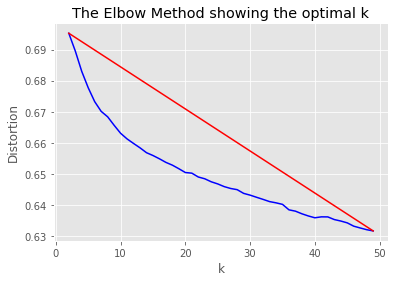

In [21]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [22]:
k = 20
kmeans = KMeans(n_clusters=k, random_state=42, n_jobs=-1)
y_pred = kmeans.fit_predict(X_reduced)
df['y'] = y_pred

C:\Users\aksha\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:973: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=100, random_state=42)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 14760 samples in 26.565s...
[t-SNE] Computed neighbors for 14760 samples in 1223.364s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14760
[t-SNE] Computed conditional probabilities for sample 2000 / 14760
[t-SNE] Computed conditional probabilities for sample 3000 / 14760
[t-SNE] Computed conditional probabilities for sample 4000 / 14760
[t-SNE] Computed conditional probabilities for sample 5000 / 14760
[t-SNE] Computed conditional probabilities for sample 6000 / 14760
[t-SNE] Computed conditional probabilities for sample 7000 / 14760
[t-SNE] Computed conditional probabilities for sample 8000 / 14760
[t-SNE] Computed conditional probabilities for sample 9000 / 14760
[t-SNE] Computed conditional probabilities for sample 10000 / 14760
[t-SNE] Computed conditional probabilities for sample 11000 / 14760
[t-SNE] Computed conditional probabilities for sample 12000 / 14760
[t-SNE] Computed conditional probabilities fo

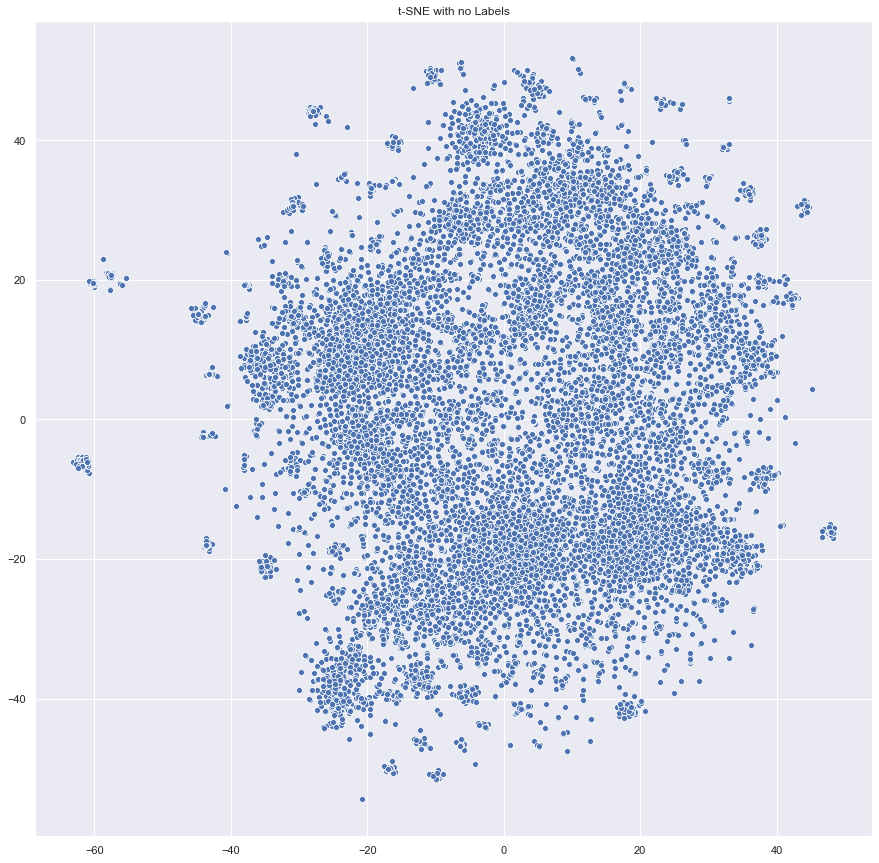

In [24]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], palette=palette)
plt.title('t-SNE with no Labels')
# plt.savefig("plots/t-sne_covid19.png")
plt.show()

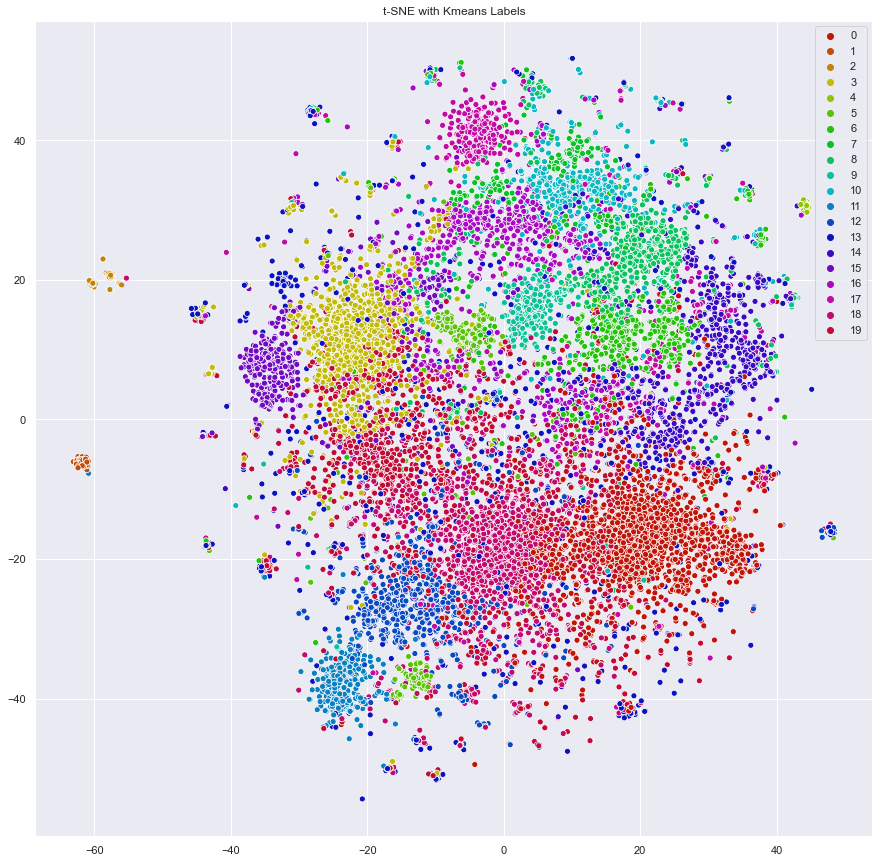

In [25]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15, 15)})

# colors
palette = sns.hls_palette(20, l=.4, s=.9)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
# plt.savefig("plots/improved_cluster_tsne.png")
plt.show()

TOPIC MODELLING

In [26]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [27]:
vectorizers = []
    
for ii in range(0, 20):
    # Creating a vectorizer
    vectorizers.append(CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}'))

In [28]:
vectorizers[0]

CountVectorizer(max_df=0.9, min_df=5, stop_words='english',
                token_pattern='[a-zA-Z\\-][a-zA-Z\\-]{2,}')

In [29]:
vectorized_data = []

for current_cluster, cvec in enumerate(vectorizers):
    try:
        vectorized_data.append(cvec.fit_transform(df.loc[df['y'] == current_cluster, 'body_text']))
    except Exception as e:
        print("Not enough instances in cluster: " + str(current_cluster))
        vectorized_data.append(None)

In [30]:
len(vectorized_data)

20

In [31]:
# number of topics per cluster
NUM_TOPICS_PER_CLUSTER = 20

lda_models = []
for ii in range(0, 20):
    # Latent Dirichlet Allocation Model
    lda = LatentDirichletAllocation(n_components=NUM_TOPICS_PER_CLUSTER, max_iter=10, learning_method='online',verbose=False, random_state=42)
    lda_models.append(lda)
    
lda_models[0]

LatentDirichletAllocation(learning_method='online', n_components=20,
                          random_state=42, verbose=False)

In [32]:
clusters_lda_data = []

for current_cluster, lda in enumerate(lda_models):
    # print("Current Cluster: " + str(current_cluster))
    
    if vectorized_data[current_cluster] != None:
        clusters_lda_data.append((lda.fit_transform(vectorized_data[current_cluster])))

In [33]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=3):
    current_words = []
    keywords = []
    
    for idx, topic in enumerate(model.components_):
        words = [(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        for word in words:
            if word[0] not in current_words:
                keywords.append(word)
                current_words.append(word[0])
                
    keywords.sort(key = lambda x: x[1])  
    keywords.reverse()
    return_values = []
    for ii in keywords:
        return_values.append(ii[0])
    return return_values

In [34]:
all_keywords = []
for current_vectorizer, lda in enumerate(lda_models):
    # print("Current Cluster: " + str(current_vectorizer))

    if vectorized_data[current_vectorizer] != None:
        all_keywords.append(selected_topics(lda, vectorizers[current_vectorizer]))

In [35]:
all_keywords[0][:10]

['model',
 'cases',
 'images',
 'countries',
 'set',
 'study',
 'information',
 'economic',
 'network',
 'function']

In [36]:
len(all_keywords)

20

In [37]:
f=open('topics.txt','w')

count = 0

for ii in all_keywords:

    if vectorized_data[count] != None:
        f.write(', '.join(ii) + "\n")
    else:
        f.write("Not enough instances to be determined. \n")
        f.write(', '.join(ii) + "\n")
    count += 1

f.close()

In [38]:
import pickle

# save the COVID-19 DataFrame, too large for github
pickle.dump(df, open("df_covid.p", "wb" ))

# save the final t-SNE
pickle.dump(X_embedded, open("X_embedded.p", "wb" ))

# save the labels generate with k-means(20)
pickle.dump(y_pred, open("y_pred.p", "wb" ))

In [39]:
# function to print out classification model report
def classification_report(model_name, test, pred):
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    
    print(model_name, ":\n")
    print("Accuracy Score: ", '{:,.3f}'.format(float(accuracy_score(test, pred)) * 100), "%")
    print("     Precision: ", '{:,.3f}'.format(float(precision_score(test, pred, average='macro')) * 100), "%")
    print("        Recall: ", '{:,.3f}'.format(float(recall_score(test, pred, average='macro')) * 100), "%")
    print("      F1 score: ", '{:,.3f}'.format(float(f1_score(test, pred, average='macro')) * 100), "%")

In [40]:
from sklearn.model_selection import train_test_split

# test set size of 20% of the data and the random seed 42 <3
X_train, X_test, y_train, y_test = train_test_split(X.toarray(),y_pred, test_size=0.2, random_state=42)

print("X_train size:", len(X_train))
print("X_test size:", len(X_test), "\n")

X_train size: 11808
X_test size: 2952 



In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier

# SGD instance
sgd_clf = SGDClassifier(max_iter=10000, tol=1e-3, random_state=42, n_jobs=-1)
# train SGD
sgd_clf.fit(X_train, y_train)

# cross validation predictions
sgd_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3, n_jobs=-1)

# print out the classification report
classification_report("Stochastic Gradient Descent Report (Training Set)", y_train, sgd_pred)

Stochastic Gradient Descent Report (Training Set) :

Accuracy Score:  87.500 %
     Precision:  89.632 %
        Recall:  89.640 %
      F1 score:  89.503 %


In [42]:
# cross validation predictions
sgd_pred = cross_val_predict(sgd_clf, X_test, y_test, cv=3, n_jobs=-1)

# print out the classification report
classification_report("Stochastic Gradient Descent Report (Testing Set)", y_test, sgd_pred)

Stochastic Gradient Descent Report (Testing Set) :

Accuracy Score:  83.943 %
     Precision:  86.624 %
        Recall:  84.644 %
      F1 score:  85.421 %


In [43]:
sgd_cv_score = cross_val_score(sgd_clf, X.toarray(), y_pred, cv=10)
print("Mean cv Score - SGD: {:,.3f}".format(float(sgd_cv_score.mean()) * 100), "%")

Mean cv Score - SGD: 88.570 %


SyntaxError: invalid syntax (<ipython-input-49-fdec1dda1479>, line 1)

In [51]:
import os

topic_path = os.path.join(os.getcwd(), 'topics.txt')
with open(topic_path) as f:
    topics = f.readlines()

In [ ]:
!pip install --quiet bokeh==0.12.0